In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('C:/Users/BrandonN/OneDrive - InSightec/Insightec/Brandon/Spotify DS Project/Data/playlist_data.xlsx')
df.head()

,Playlist Name,Song Name,Artist,Album,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_Ms,Time_Signature
0,Winter 2022-2023,Next To You,Dirty Loops,Phoenix,0.477,0.808,1,-6.692,1,0.1890,0.0617,0.000003,0.1500,0.423,84.992,497647,4
1,Winter 2022-2023,Repeat,July Talk,Repeat / After This / Certain Father / Hold,0.554,0.552,0,-7.489,1,0.0367,0.0657,0.037800,0.2170,0.186,117.082,270724,4
2,Winter 2022-2023,"Lover, Please Stay",Nothing But Thieves,Nothing But Thieves (Track by Track),0.401,0.123,1,-10.427,1,0.0306,0.9540,0.000000,0.0925,0.129,73.735,247200,4
3,Winter 2022-2023,The Joke,Brandi Carlile,"By The Way, I Forgive You",0.236,0.578,7,-5.477,1,0.0404,0.3270,0.000150,0.2060,0.227,75.367,279373,4
4,Winter 2022-2023,all in my mind,isaac gracie,isaac gracie (extended edition),0.359,0.418,8,-9.016,1,0.0363,0.4970,0.003510,0.1070,0.126,131.722,239413,3


# EDA

In [17]:
df.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_Ms,Time_Signature
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.492029,0.584574,5.261391,-8.164141,0.724221,0.053300,0.292623,0.132315,0.180865,0.360447,122.548141,264932.158273,3.856115
std,0.150306,0.222214,3.548601,3.360045,0.447443,0.055588,0.312593,0.257722,0.144439,0.227022,28.620231,72178.385733,0.522031
min,0.102000,0.000282,0.000000,-28.232000,0.000000,0.024200,0.000004,0.000000,0.049600,0.025700,54.406000,117571.000000,1.000000
25%,0.388000,0.423000,2.000000,-9.924000,0.000000,0.031200,0.021600,0.000034,0.099400,0.174000,101.249000,216413.000000,4.000000
50%,0.492000,0.580000,5.000000,-7.731000,1.000000,0.037200,0.157000,0.002210,0.120000,0.312000,123.017000,250067.000000,4.000000
75%,0.603000,0.768000,8.000000,-6.046000,1.000000,0.049500,0.543000,0.081300,0.209000,0.518000,140.852000,303514.000000,4.000000
max,0.927000,0.983000,11.000000,-2.135000,1.000000,0.455000,0.987000,0.966000,0.966000,0.981000,201.604000,597600.000000,5.000000


What do all of these audio features mean??

- **Danceability**: How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **Key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. The higher the value, the "louder" a song is.

- **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **Duration_MS**: The duration of the track in milliseconds.

- **Time_Signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

Through this EDA, I want to understand the distribution of these audio features individually and then see if these audio features have correlations with each other. 

In [36]:
#Converting Duration from MS to Min
df['Duration_Min'] = (df['Duration_Ms']/1000)/60

#Function to create histograms
def hists(var):
    
    #Boxplot with overall Distribution
    sns.histplot(x=var, data=df)
    plt.title(var)
    plt.show()

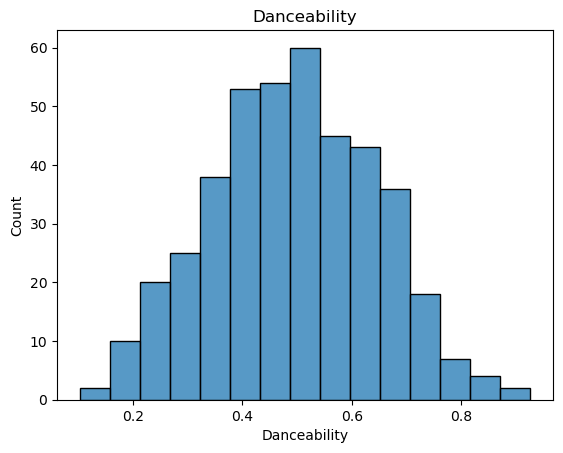

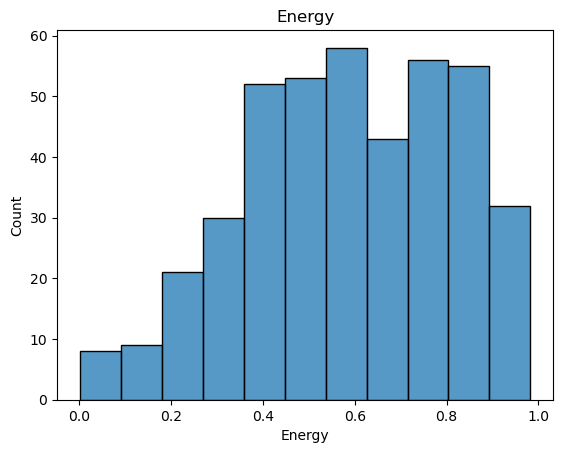

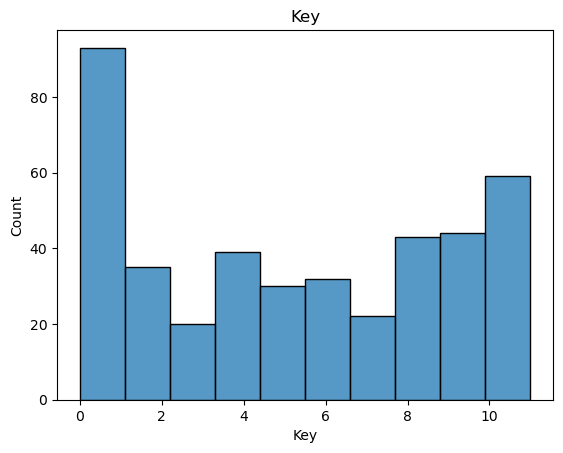

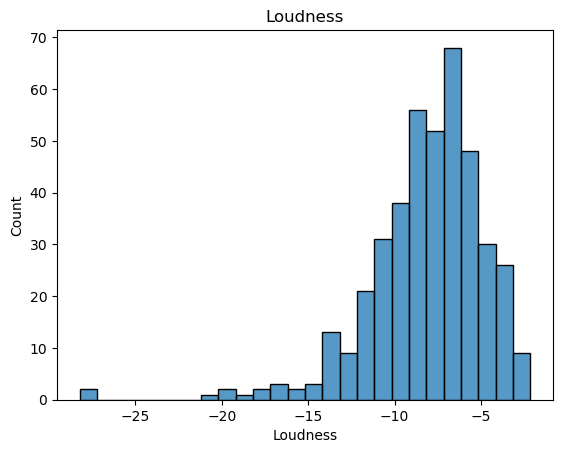

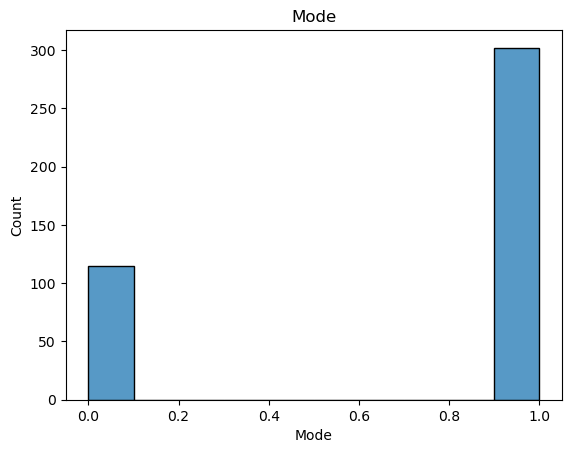

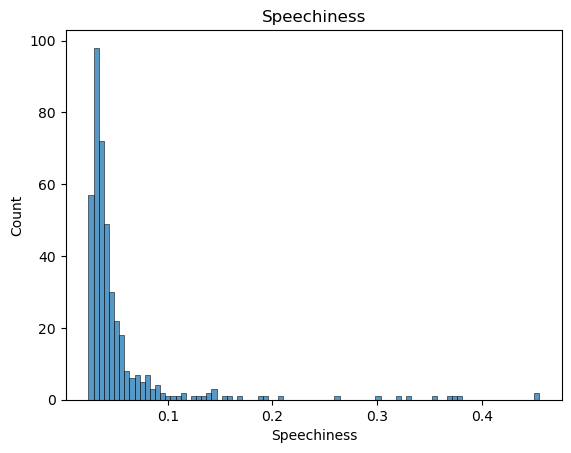

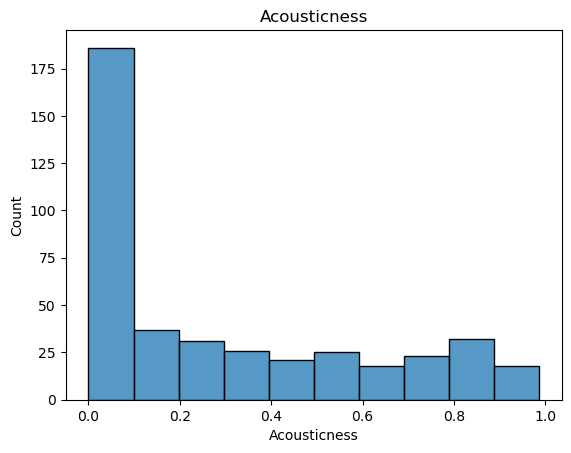

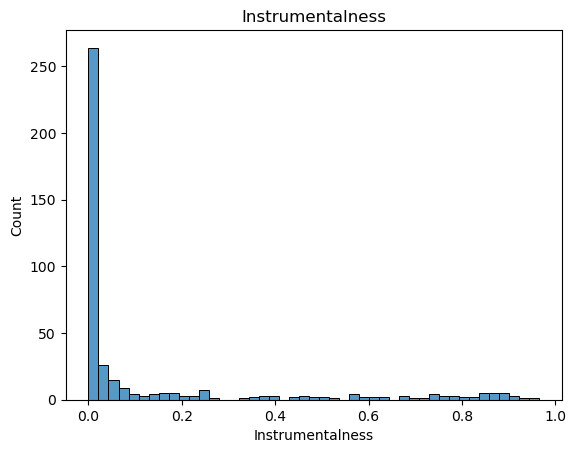

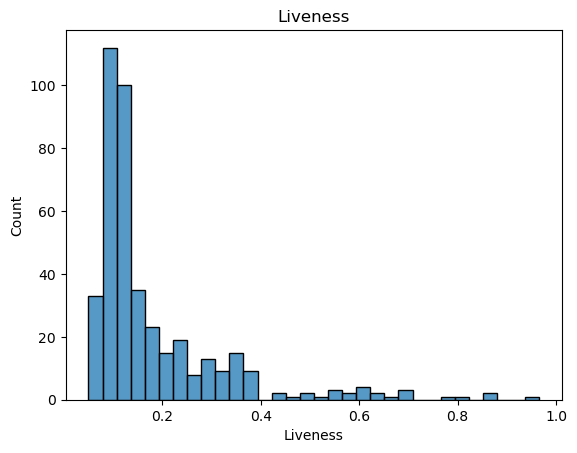

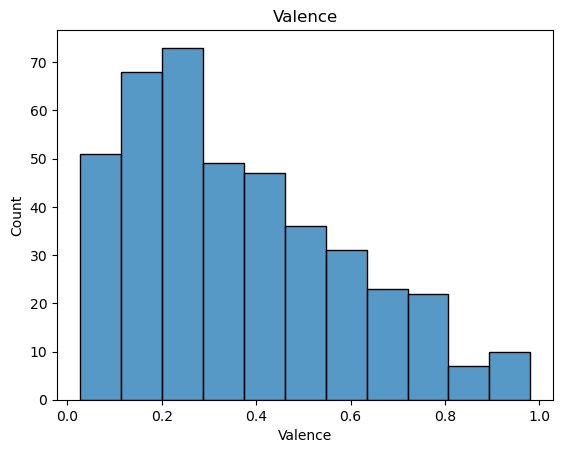

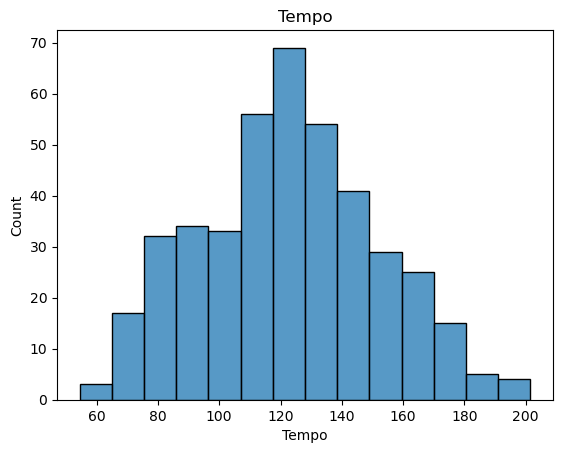

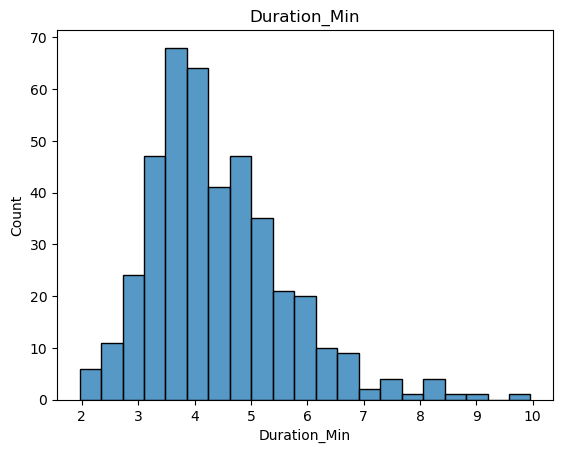

In [37]:
var_list = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
            'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_Min']

for var in var_list:
    hists(var)

Based on the distributions, I noticed the following observations:
- **Danceability**: Very even distribution. Lot of variety!
- **Energy**: Definitely a preference for higher-energy songs
- **Key**: Lot of variation in the keys
- **Loudness**; Definitely prefer my music on the louder side.
- **Mode**: Majority of tracks (75%) are in a major key
- **Speechiness**: Nearly all my music is low on speechiness. This makes sense since it's primarily music and not spoken-word
- **Acousticness**: Most of my music is non-acoustic
- **Instrumentalness**: Most of my music is also non-instrumental aka most of my music has vocals
- **Liveness**: Most of my music is non-live aka studio recordings
- **Valence**: Valence skews left indicating a more negative preference
- **Tempo**: Similar to Danceability, lots of variety in tempo
- **Duration**: Most of my songs  are 3-6 minutes in duration; fairly standard

Now let's look at the correlation between the features to see if there are any underlying relationships.

## Correlation Among Features

C:\Users\BrandonN\AppData\Local\Temp\ipykernel_25268\3382600123.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(features.corr(), dtype=np.bool)),


Text(0.5, 1.0, 'Correlation Heatmap')

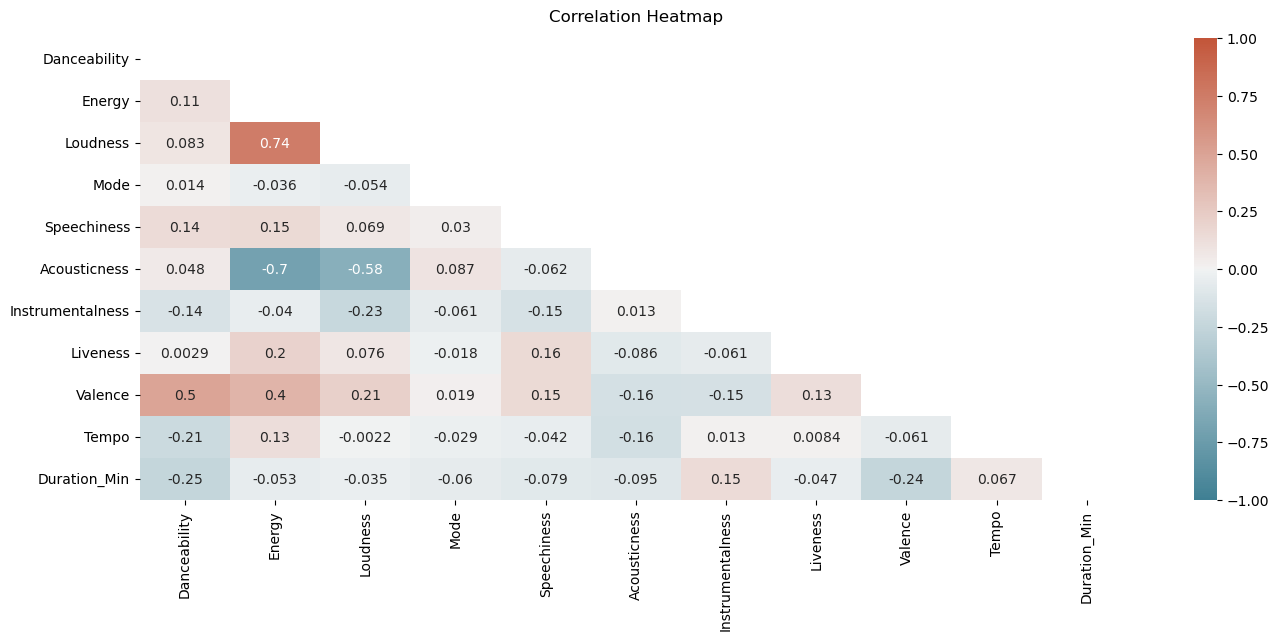

In [48]:
features = df[['Danceability', 'Energy', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
              'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_Min']]

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True, 
                      mask = np.triu(np.ones_like(features.corr(), dtype=np.bool)),
                      cmap= sns.diverging_palette(220, 20, as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

The most positively correlated pairs are Energy and Loudness (0.74) and Danceability and Valence (0.5). The most negatively correlated pairs are Energy and Acousticness (-0.7) and Loudness and Acousticness (-0.57). Based on how these variables are defined and quantified, these correlations make complete sense.

To avoid a biased estimate and to focus on relevant variables, I will remove the following features from the model:

- Key
- Loudness
- Speechiness
- Instrumentalness
- Liveness
- Duration

I personally do not have a strong interest for whether or not a song has/doesn't have words, what key it's in, how long it is, or how present an audience is. Ideally I would like to categorize these songs based on how I'm feeling, so I only want to focus on the variables that quantify mood the best. In the next notebook "SpotifyClustering.nb", I will train clustering algorithms on my dataset in order to accomplish this goal.